In [3]:
from pyod.utils.data import generate_data
from pyod.models.knn import KNN
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import numpy as np

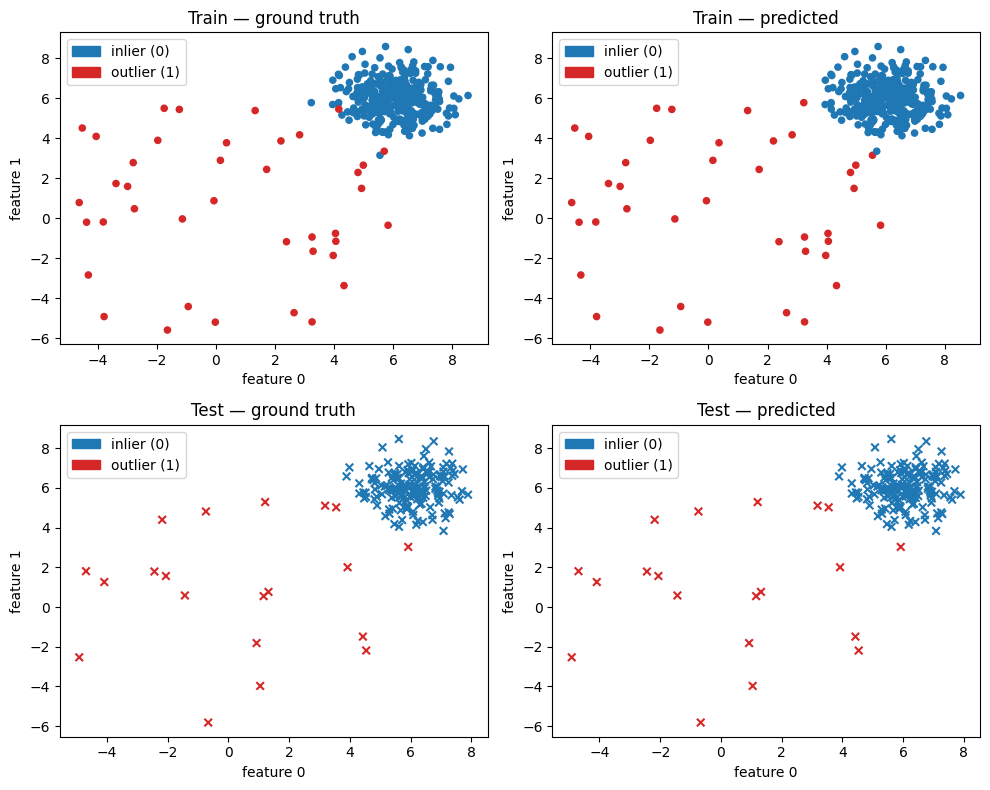

In [ ]:
dataset = generate_data(n_train = 400, n_test = 200, n_features = 2, contamination = 0.1, random_state = 42)

X_train, X_test, y_train, y_test = dataset

# tested with n_neighbors = 5, 7, 10, 15; best results with 15
# see results below with balanced acc score
neighbors = 15

model = KNN(n_neighbors=neighbors)
model.fit(X_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# color map: index 0 = inlier (blue), 1 = outlier (red)
cmap = ListedColormap(['tab:blue', 'tab:red'])
inlier_patch = mpatches.Patch(color='tab:blue', label='inlier (0)')
outlier_patch = mpatches.Patch(color='tab:red', label='outlier (1)')

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Top-left: Train ground truth
ax = axes[0, 0]
ax.set_title("Train — ground truth")
sc = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap, s=20)
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.legend(handles=[inlier_patch, outlier_patch])

# Top-right: Train predicted
ax = axes[0, 1]
ax.set_title("Train — predicted")
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train_pred, cmap=cmap, s=20)
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.legend(handles=[inlier_patch, outlier_patch])

# Bottom-left: Test ground truth
ax = axes[1, 0]
ax.set_title("Test — ground truth")
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap, marker='x', s=30)
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.legend(handles=[inlier_patch, outlier_patch])

# Bottom-right: Test predicted
ax = axes[1, 1]
ax.set_title("Test — predicted")
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, cmap=cmap, marker='x', s=30)
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.legend(handles=[inlier_patch, outlier_patch])

plt.tight_layout()
plt.show()

In [11]:
def confusion_stats(y_true, y_pred):
    y_true = np.array(y_true).ravel()
    y_pred = np.array(y_pred).ravel()
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP, TN, FP, FN

def metrics_from_confusion(TP, TN, FP, FN):
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0.0
    balanced_accuracy = 0.5 * (recall + specificity)
    return balanced_accuracy

TP_train, TN_train, FP_train, FN_train = confusion_stats(y_train, y_train_pred)
TP_test, TN_test, FP_test, FN_test = confusion_stats(y_test, y_test_pred)
balanced_accuracy_train = metrics_from_confusion(TP_train, TN_train, FP_train, FN_train)
balanced_accuracy_test = metrics_from_confusion(TP_test, TN_test, FP_test, FN_test)

print(f"Balanced accuracy (train): {balanced_accuracy_train:.4f}")
print(f"Balanced accuracy (test): {balanced_accuracy_test:.4f}")


Balanced accuracy (train): 0.9722
Balanced accuracy (test): 1.0000
